In [12]:
import pandas            as pd
import matplotlib.pyplot as plt
import seaborn           as sns

In [2]:
file_path = 'D:/DX/Housing.xlsx'
housing   = pd.read_excel(file_path)
housing.head()

id     price  area  bedrooms  bathrooms  stories mainroad guestroom  \
0   1  13300000  7420         4          2        3      yes        no   
1   2  12250000  8960         4          4        4      yes        no   
2   3  12250000  9960         3          2        2      yes        no   
3   4  12215000  7500         4          2        2      yes        no   
4   5  11410000  7420         4          1        2      yes       yes   

  basement hotwaterheating airconditioning  parking prefarea furnishingstatus  
0       no              no             yes        2      yes        furnished  
1       no              no             yes        3       no        furnished  
2      yes              no              no        2      yes   semi-furnished  
3      yes              no             yes        3      yes        furnished  
4      yes              no             yes        2       no        furnished

In [ ]:
# 데이터의 종류
# (1) 범주형 데이터(Categorical Data) : 질적 자료 : 문자, 숫자(숫자의 의미가 없음)
# (2) 수치형 데이터(Numerical   Data) : 양적 자료 : 숫자(숫자의 의미가 있음)

In [3]:
# 1. 범주형 데이터 분석(1개의 열)

In [4]:
frequency  = housing['mainroad'].value_counts()
percentage = housing['mainroad'].value_counts(normalize=True) * 100

result = pd.DataFrame({'Frequency': frequency, 'Percentage': percentage})
result

Frequency  Percentage
mainroad                       
yes             468    85.87156
no               77    14.12844

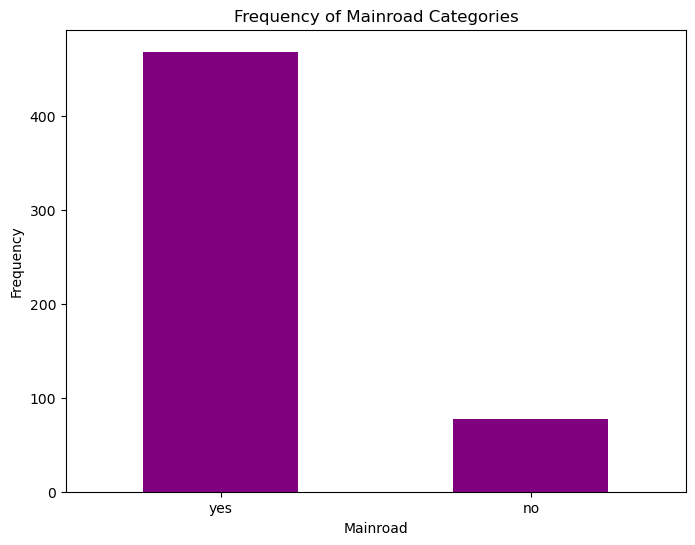

In [6]:
plt.figure(figsize = (8, 6))
frequency.plot(kind = 'bar', color = 'purple')
plt.title('Frequency of Mainroad Categories')
plt.xlabel('Mainroad')
plt.ylabel('Frequency')
plt.xticks(rotation = 0)
plt.show()

In [7]:
# 2. 수치형 데이터 분석(1개의 열)

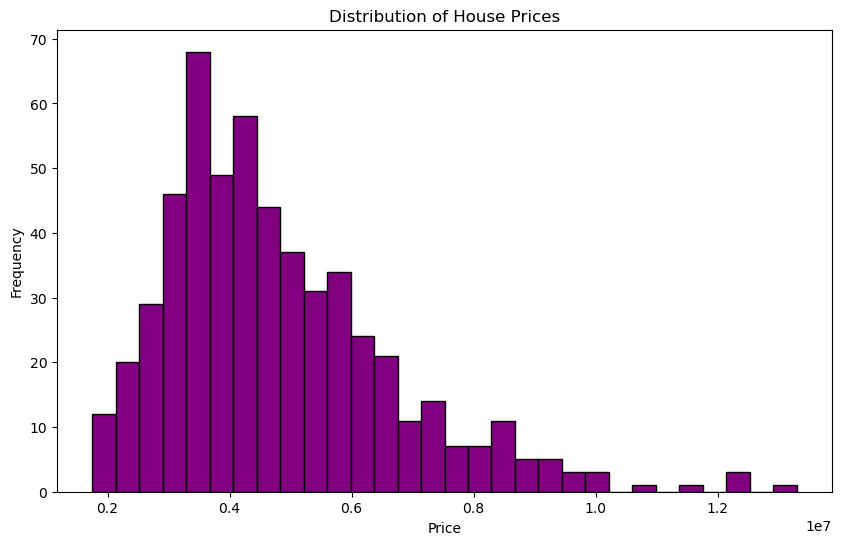

In [8]:
plt.figure(figsize=(10, 6))
plt.hist(housing['price'], bins = 30, color = 'purple', edgecolor = 'black')
plt.title('Distribution of House Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

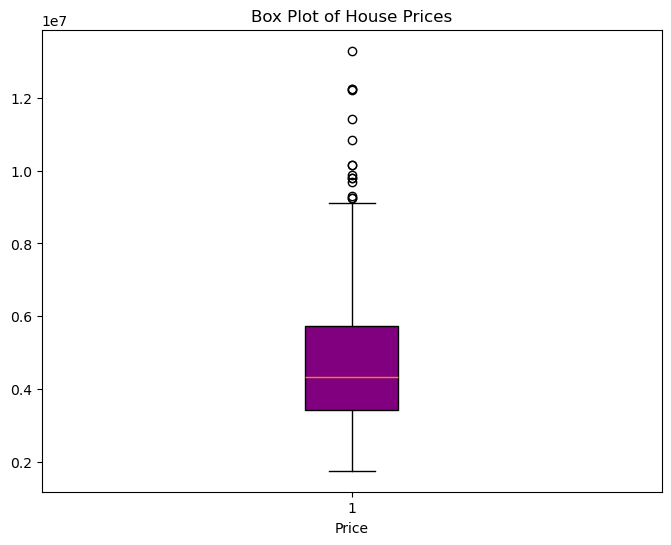

In [11]:
plt.figure(figsize=(8, 6))
plt.boxplot(housing['price'], 
            vert         = True, 
            patch_artist = True, 
            boxprops     = dict(facecolor = 'purple'))
plt.title('Box Plot of House Prices')
plt.xlabel('Price')
plt.show()

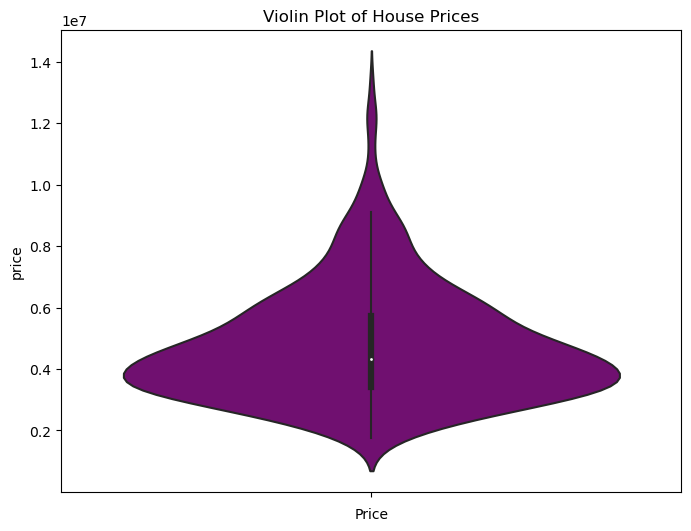

In [14]:
# price 열에 대한 바이올린 그래프 그리기
plt.figure(figsize = (8, 6))
sns.violinplot(y = housing['price'], color = 'purple')
plt.title('Violin Plot of House Prices')
plt.xlabel('Price')
plt.show()

In [15]:
housing['price'].describe()

count    5.450000e+02
mean     4.766729e+06
std      1.870440e+06
min      1.750000e+06
25%      3.430000e+06
50%      4.340000e+06
75%      5.740000e+06
max      1.330000e+07
Name: price, dtype: float64

In [16]:
# 50% : Median : 중위수, 중앙값 : 순서적으로 가운데 있는 값
# Robustness   : 강건성

In [17]:
# 3. 범주형 데이터 분석(2개의 열)
# X, Y
# Y : 가장 중요하게 생각하는 열 : Label or Target
# X : Y에 관계가 있어 보이는 열

In [18]:
# (1) 교차표 : 빈도, 행백분율
# 행 : X : hotwaterheating
# 열 : Y : airconditioning

In [19]:
# 교차표 생성 (빈도)
cross_tab_freq = pd.crosstab(index   = housing['hotwaterheating'], 
                             columns = housing['airconditioning'])
cross_tab_freq

airconditioning   no  yes
hotwaterheating          
no               349  171
yes               24    1

In [20]:
cross_tab_row_percentage = pd.crosstab(index     = housing['hotwaterheating'], 
                                       columns   = housing['airconditioning'], 
                                       normalize = 'index') * 100
cross_tab_row_percentage

airconditioning         no        yes
hotwaterheating                      
no               67.115385  32.884615
yes              96.000000   4.000000

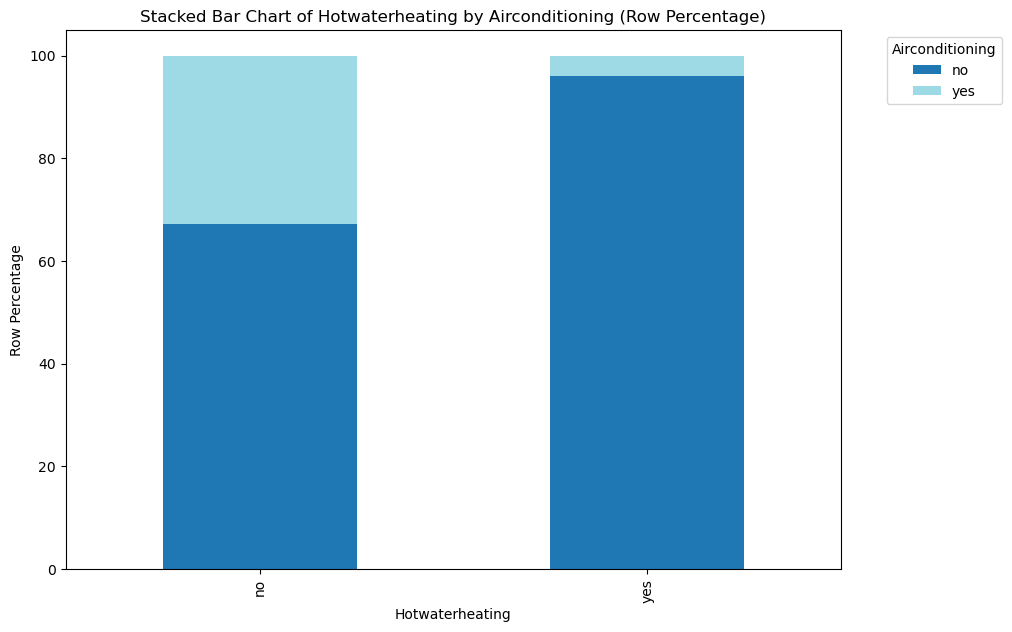

In [21]:
# 누적 막대그래프 그리기
cross_tab_row_percentage.plot(kind     = 'bar', 
                              stacked  = True, 
                              figsize  = (10, 7), 
                              colormap = 'tab20')

plt.title('Stacked Bar Chart of Hotwaterheating by Airconditioning (Row Percentage)')
plt.xlabel('Hotwaterheating')
plt.ylabel('Row Percentage')
plt.legend(title = 'Airconditioning', bbox_to_anchor = (1.05, 1), loc = 'upper left')
plt.show()

In [22]:
# 4. 범주별 수치형 데이터 분석
# Y : 수치형 데이터, X : 범주형 데이터
# Y : 범주형 데이터, X : 수치형 데이터

In [23]:
# (1) 범주별 데이터 시각화 : 히스토그램, 상자그림, 바이올린
# X : mainroad
# Y : price

C:\Users\buillee\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\buillee\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


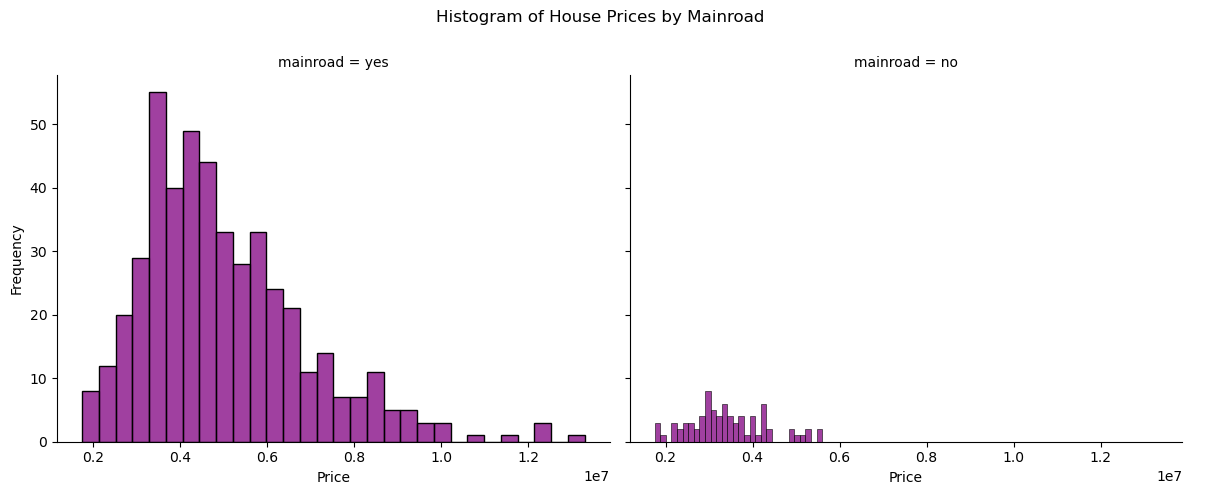

In [24]:
g = sns.FacetGrid(housing, col = "mainroad", height = 5, aspect = 1.2)
g.map(sns.histplot, "price", bins = 30, kde = False, color = "purple")

# 그래프 제목과 라벨 추가
g.set_axis_labels("Price", "Frequency")
g.add_legend()

plt.subplots_adjust(top=0.85)
g.fig.suptitle('Histogram of House Prices by Mainroad')
plt.show()

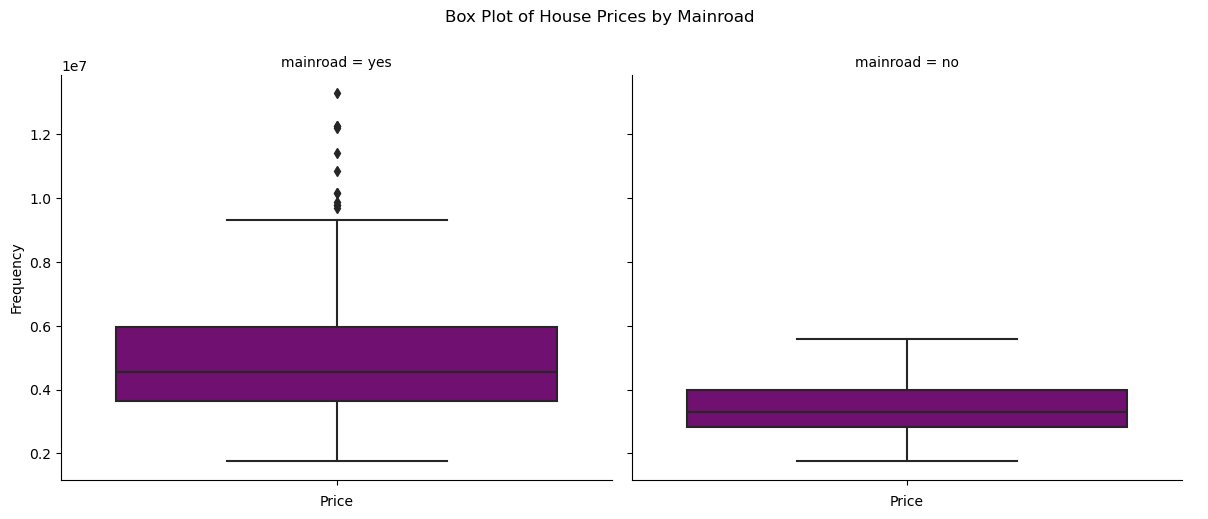

In [26]:
g = sns.FacetGrid(housing, col = "mainroad", height = 5, aspect = 1.2)
g.map_dataframe(sns.boxplot, y = "price", color = "purple")

# 그래프 제목과 라벨 추가
g.set_axis_labels("Price", "Frequency")
g.add_legend()

plt.subplots_adjust(top = 0.85)
g.fig.suptitle('Box Plot of House Prices by Mainroad')
plt.show()

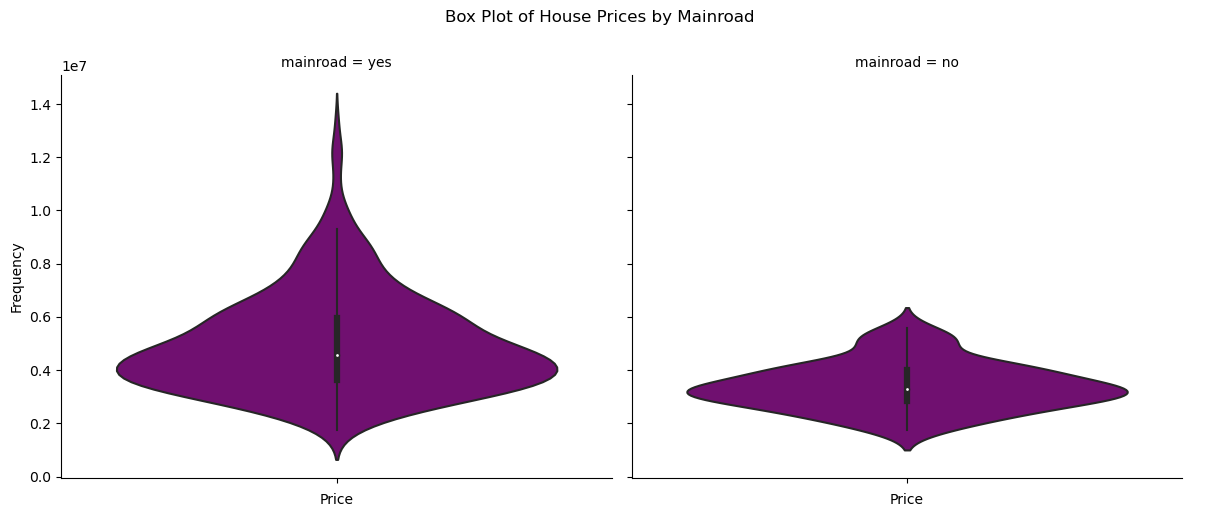

In [27]:
g = sns.FacetGrid(housing, col = "mainroad", height = 5, aspect = 1.2)
g.map_dataframe(sns.violinplot, y = "price", color = "purple")

# 그래프 제목과 라벨 추가
g.set_axis_labels("Price", "Frequency")
g.add_legend()

plt.subplots_adjust(top = 0.85)
g.fig.suptitle('Box Plot of House Prices by Mainroad')
plt.show()

In [28]:
# (2) 범주별 기술통계량
housing.groupby('mainroad')['price'].describe()

count          mean           std        min        25%        50%  \
mainroad                                                                       
no         77.0  3.398905e+06  8.947355e+05  1750000.0  2835000.0  3290000.0   
yes       468.0  4.991777e+06  1.893639e+06  1750000.0  3638250.0  4550000.0   

                75%         max  
mainroad                         
no        3990000.0   5600000.0  
yes       5967500.0  13300000.0

In [29]:
# 비교할 때는 기준이 같아야 함
# 보통 비교할 때에 평균(중심)을 가지고 함
# 다름을 비교 : 만약에 두 범주(집단)의 평균이 같다면 표준편차로 비교함
# 다름을 비교 : 만약에 두 범주(집단)의 평균이 다르면 변동계수(CV : Coefficient of Variation)
# 변동계수 = (표준편차/평균)*100

NO_CV  = (8.947355e+05/3.398905e+06)*100
YES_CV = (1.893639e+06/4.991777e+06)*100

print(NO_CV)
print(YES_CV)

26.32422794988386
37.935168177584856


In [30]:
# 5. 수치형 데이터의 분석(2개의 열)
# Y : 수치형 데이터
# X : 수치형 데이터

# 상관관계(Correlation) = 직선의 관계(Linear) = 선형의 관계(Linear)

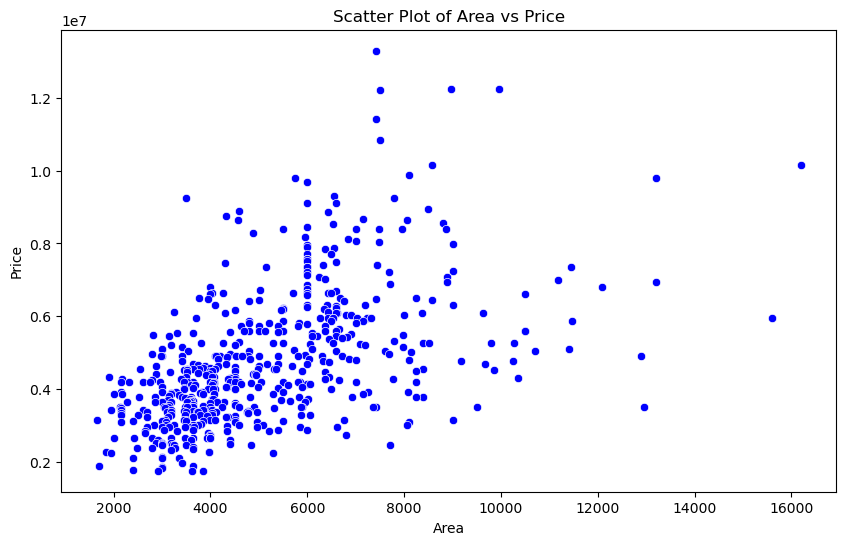

In [31]:
# (1) 산점도(Scatter Plot)

plt.figure(figsize = (10, 6))
sns.scatterplot(x = 'area', y = 'price', data = housing, color = 'blue')

# 그래프 제목과 라벨 추가
plt.title('Scatter Plot of Area vs Price')
plt.xlabel('Area')
plt.ylabel('Price')

# 그래프 보여주기
plt.show()

In [32]:
# (2) 상관계수(Ceofficient of Correlation)
housing['area'].corr(housing['price'])

0.5359973457780797

In [ ]:
# 상관계수 : 0.536

# 상관계수의 일반적인 해석 가이드 : 절대값
# 0.0 이상 ~ 0.2 미만 : 상관관계가 없다.
# 0.2 이상 ~ 0.4 미만 : 약한(낮는) 상관관계가 있다.
# 0.4 이상 ~ 0.6 미만 : 보통이 상관관계가 있다.
# 0.6 이상 ~ 0.8 미만 : 강한(높은) 상관관계가 있다.
# 0.8 이상 ~ 1.0 이하 : 매우 강한(높은) 상관관계가 있다.

# 부호(Sign) 
# + : 양의 상관관계
# - : 음의 상관관계